In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
df = pd.read_csv("flights_NY.csv")
df = df.dropna(axis = 0)
df.head(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [15]:
num_col = [i for i in df.columns if df[i].dtype in ["int", "float"]]
num_df = df[num_col]
num_df.corr()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.005036,-0.003735,-0.020055,-0.002457,-0.017382,0.000980,0.010924,0.020399
day,NaN,0.005036,1.000000,-0.000393,0.000591,-0.005404,-0.000319,-0.000849,0.002236,0.003216
dep_time,NaN,-0.003735,-0.000393,1.000000,0.259613,0.662509,0.232306,0.041530,-0.014619,-0.014134
dep_delay,NaN,-0.020055,0.000591,0.259613,1.000000,0.029421,0.914803,0.053970,-0.022405,-0.021681
arr_time,NaN,-0.002457,-0.005404,0.662509,0.029421,1.000000,0.024482,0.025007,0.054296,0.047189
arr_delay,NaN,-0.017382,-0.000319,0.232306,0.914803,0.024482,1.000000,0.072862,-0.035297,-0.061868
flight,NaN,0.000980,-0.000849,0.041530,0.053970,0.025007,0.072862,1.000000,-0.472838,-0.481460
air_time,NaN,0.010924,0.002236,-0.014619,-0.022405,0.054296,-0.035297,-0.472838,1.000000,0.990650
distance,NaN,0.020399,0.003216,-0.014134,-0.021681,0.047189,-0.061868,-0.481460,0.990650,1.000000


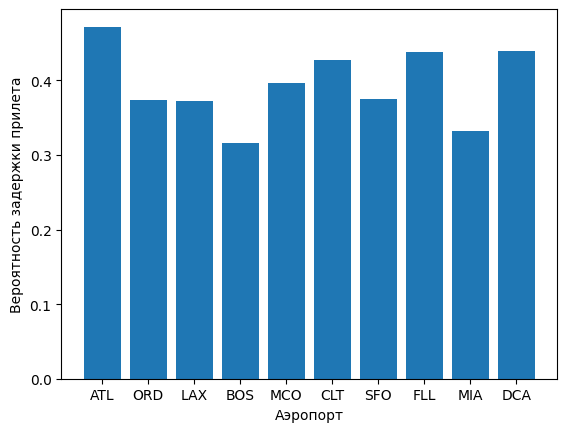

In [16]:
names = df["dest"].value_counts().sort_values(ascending=False)[:10].index.tolist()
delays = []
df["arr_delay_is_pos"] = df["arr_delay"] > 0
for name in names:
    delays.append(df[df["dest"] == name]["arr_delay_is_pos"].mean())

plt.bar(names, delays)
plt.xlabel("Аэропорт")
plt.ylabel("Вероятность задержки прилета")
plt.show()

In [17]:
sorted(list(zip(names, delays)), key=lambda x: x[1])

[('BOS', np.float64(0.31573691918519503)),
 ('MIA', np.float64(0.3325282498059174)),
 ('LAX', np.float64(0.3723324597529015)),
 ('ORD', np.float64(0.3741398044186889)),
 ('SFO', np.float64(0.37508540195855156)),
 ('MCO', np.float64(0.39700723133099447)),
 ('CLT', np.float64(0.42694164107064503)),
 ('FLL', np.float64(0.4380936370513575)),
 ('DCA', np.float64(0.43935901657337284)),
 ('ATL', np.float64(0.47193680584427156))]

Вывод: ATL - наибольшая вероятность задержки (0.47), BOS - наименьшая (0.32). Вероятность задержки рейса сильно меняется среди 10 аэропортов с наибольшими задержками.

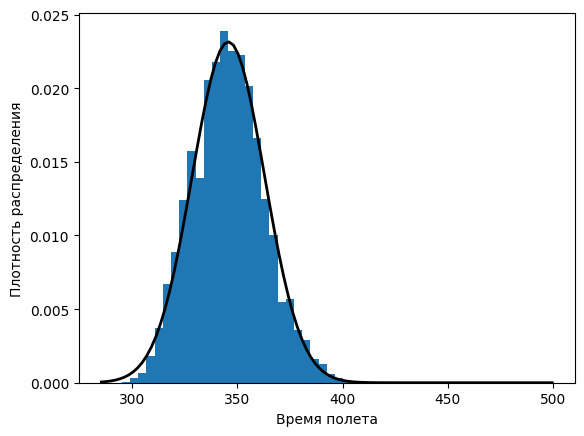

In [18]:
from scipy.stats import norm
import numpy as np

air_time = df[df["dest"] == "SFO"]["air_time"]
plt.hist(air_time, bins= 50, density=True)

mu, std = air_time.mean(), air_time.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Время полета")
plt.ylabel("Плотность распределения")
plt.show()

Вывод:  Распредение времени полета похоже на нормальное рампределение. 
Среднее: 345.68 и стандартное отклонение: 17.23. 
Не менее 95% лежит между: 293.98, 397.39 (mean +- 3 * std)

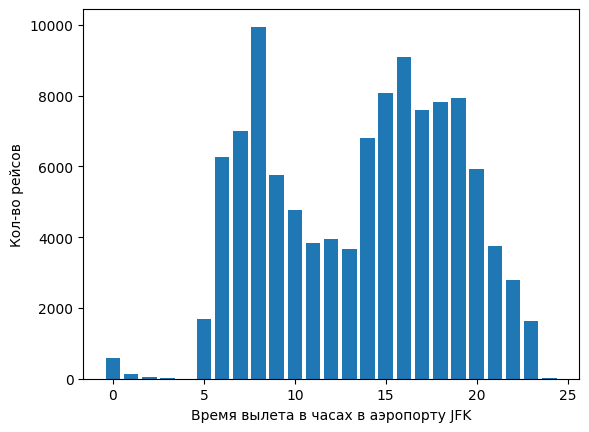

In [19]:
df["dep_time_in_hours"] = df["dep_time"] // 100
dep_form_jfk = df[df["origin"] == "JFK"]["dep_time_in_hours"].value_counts().sort_index()
plt.bar(dep_form_jfk.index, dep_form_jfk.values)
plt.xlabel("Время вылета в часах в аэропорту JFK")
plt.ylabel("Кол-во рейсов")
plt.show()

По графику видно, что первый пиковый час - 8, второй - 16

In [20]:
from scipy import stats
del8 = df[df["dep_time_in_hours"] == 8]["dep_delay"].mean()
del16 = df[df["dep_time_in_hours"] == 16]["dep_delay"].mean()
print("Средняя задержка в 8 часов: {} и 16 часов: {}".format(del8, del16))
t, p_val = stats.ttest_ind(
    df[df['dep_time_in_hours'] == 8]['dep_delay'],
    df[df['dep_time_in_hours'] == 16]['dep_delay'],
    equal_var=False
)

print("Проведем t-тест Стьюдента: p-value = {} < 0.05".format(p_val))

Средняя задержка в 8 часов: 1.0923123601471536 и 16 часов: 13.557249505306709
Проведем t-тест Стьюдента: p-value = 0.0 < 0.05


Вывод: В 16 часов средняя задержка больше, чем в 8. Согласно t-тесту Стьюдента: различие стат занчимо.

MSE: Простая линейная регрессия: 5.77
MSE: Уточненная линейная регрессия: 3.18


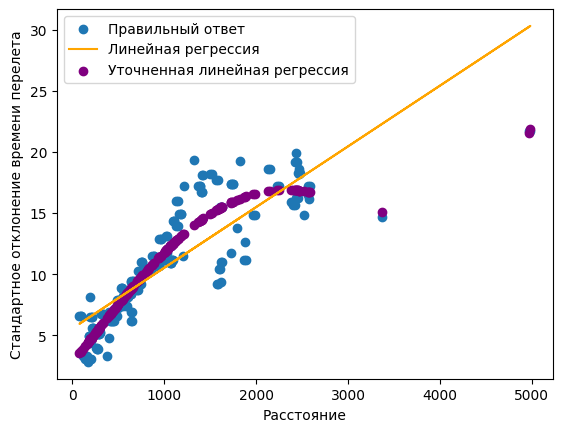

In [21]:
airp_delay = pd.DataFrame(df.groupby("dest")["air_time"].std().sort_index())
airp_dist = df[["dest", "distance"]].drop_duplicates()
airp_delay = airp_delay.merge(airp_dist, on="dest")
airp_delay = airp_delay.dropna(axis=0)

plt.scatter(airp_delay['distance'], airp_delay['air_time'], label='Правильный ответ')
plt.xlabel('Расстояние')
plt.ylabel('Стандартное отклонение времени перелета')

model = LinearRegression()

X = airp_delay[['distance']]
y = airp_delay['air_time']
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='orange', label='Линейная регрессия')
print("MSE: Простая линейная регрессия: {:.2f}".format(mean_squared_error(y, y_pred)))

airp_delay['distance_2'] = airp_delay['distance'] ** 2
airp_delay['distance_3'] = airp_delay['distance'] ** 3
airp_delay['distance_4'] = airp_delay['distance'] ** 4
X = airp_delay[['distance', 'distance_2', 'distance_3', 'distance_4']]
y = airp_delay['air_time']
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(airp_delay['distance'], y_pred, color='purple', label='Уточненная линейная регрессия')
print("MSE: Уточненная линейная регрессия: {:.2f}".format(mean_squared_error(y, y_pred)))

plt.legend()
plt.show()

Вывод: 
MSE простой линейной регрессии: 5.77. 
MSE уточненной линейной регрессии, добавлены степении distance (^2, ^3, ^4): 3.18. 
MSE уточненной меньше в два раза.

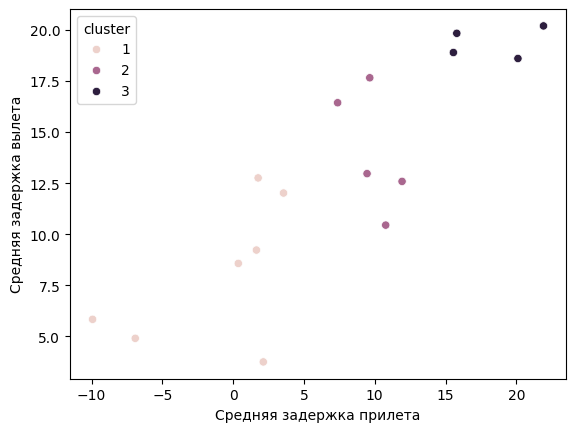

In [22]:
from sklearn.cluster import KMeans

companies = df.groupby("carrier")[["arr_delay"]].mean()
companies = companies.merge(df.groupby("carrier")[["dep_delay"]].mean(), on="carrier")
companies["cluster"] = KMeans(n_clusters=3, random_state=2).fit(companies).labels_
companies["cluster"] = companies["cluster"].map(lambda x: 2 if x == 2 else 3 if x == 0 else 1)
fig = sns.scatterplot(data=companies, x="arr_delay", y = "dep_delay", hue = "cluster")
fig.set(xlabel ="Средняя задержка прилета", ylabel = "Средняя задержка вылета")
plt.show()

In [23]:
print("Вывод: Авиакомпании разбились на кластеры:")
print(companies[companies["cluster"] == 1].index.tolist(), "Первый кластер:  крупные, традиционные авиакомпании")
print(companies[companies["cluster"] == 2].index.tolist(), "Второй кластер: региональные авиакомпании или бюджетные авиакомпании")
print(companies[companies["cluster"] == 3].index.tolist(), "Третий кластер: региональные авиакомпании")

Вывод: Авиакомпании разбились на кластеры:
['AA', 'AS', 'DL', 'HA', 'UA', 'US', 'VX'] Первый кластер:  крупные, традиционные авиакомпании
['9E', 'B6', 'MQ', 'OO', 'WN'] Второй кластер: региональные авиакомпании или бюджетные авиакомпании
['EV', 'F9', 'FL', 'YV'] Третий кластер: региональные авиакомпании
